<a href="https://colab.research.google.com/github/gdakshareddybt23/Bioinformatics/blob/main/CNN_for_metabolic_disorders_in_indian_women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [2]:
np.random.seed(42)

n_yes, n_no = 252, 355

data_yes = pd.DataFrame({
    "Age": np.random.normal(50.4, 7.23, n_yes),
    "BMI": np.random.normal(28.5, 4.2, n_yes),
    "SBP": np.random.normal(138, 15, n_yes),
    "DBP": np.random.normal(88, 10, n_yes),
    "Glucose": np.random.normal(115, 20, n_yes),
    "Label": 1
})

data_no = pd.DataFrame({
    "Age": np.random.normal(49.8, 7.38, n_no),
    "BMI": np.random.normal(23.1, 3.6, n_no),
    "SBP": np.random.normal(122, 12, n_no),
    "DBP": np.random.normal(78, 8, n_no),
    "Glucose": np.random.normal(92, 15, n_no),
    "Label": 0
})

df = pd.concat([data_yes, data_no], ignore_index=True)


In [3]:
X = df.drop("Label", axis=1)
y = df["Label"].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
images = []
for row in X_scaled:
    padded = np.pad(row, (0,1))
    img = padded.reshape(2,3)
    images.append(img)

X_img = np.array(images)
X_img = X_img[..., np.newaxis]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_img, y, test_size=0.2, random_state=42
)


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(2,3,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1, 2, 32)       │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,273 (8.88 KB)

 Trainable params: 2,273 (8.88 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=16,
    validation_split=0.2
)


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8850 - loss: 0.2674 - val_accuracy: 0.9485 - val_loss: 0.1596
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9042 - loss: 0.2324 - val_accuracy: 0.9485 - val_loss: 0.1579
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9137 - loss: 0.2401 - val_accuracy: 0.9381 - val_loss: 0.1705
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8866 - loss: 0.2790 - val_accuracy: 0.9278 - val_loss: 0.1761
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8969 - loss: 0.2573 - val_accuracy: 0.9381 - val_loss: 0.1671
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9063 - loss: 0.2382 - val_accuracy: 0.9175 - val_loss: 0.1869
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9115 - loss: 0.2380 - val_accuracy: 0.9485 - val_loss: 0.1622
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8817 - loss: 0.2705 - val_accuracy: 0.9381 - val_lo

In [12]:
new_woman = np.array([[52, 29.0, 140, 90, 120]])
new_scaled = scaler.transform(new_woman)

img = np.pad(new_scaled[0], (0,1)).reshape(2,3)
img = img[np.newaxis, ..., np.newaxis]

prediction = model.predict(img)[0][0]

if prediction >= 0.5:
    print("Metabolic disorder EXISTS")
else:
    print("Metabolic disorder DOES NOT exist")

print("Prediction probability:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Metabolic disorder EXISTS
Prediction probability: 0.9815696


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


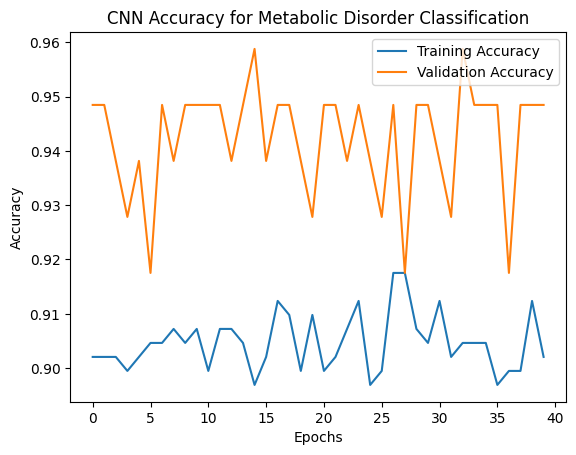

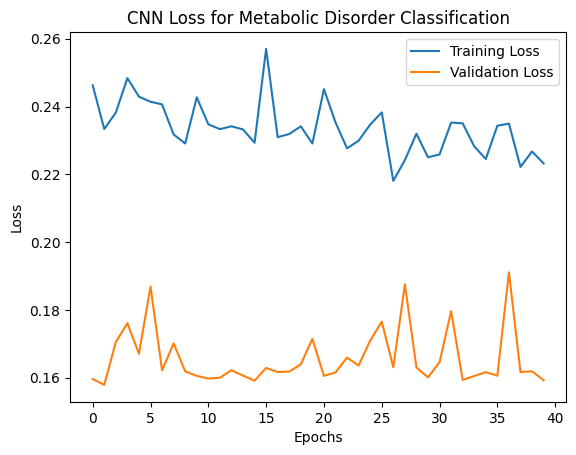

In [13]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy for Metabolic Disorder Classification')
plt.legend()
plt.show()

# Loss plot
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Loss for Metabolic Disorder Classification')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


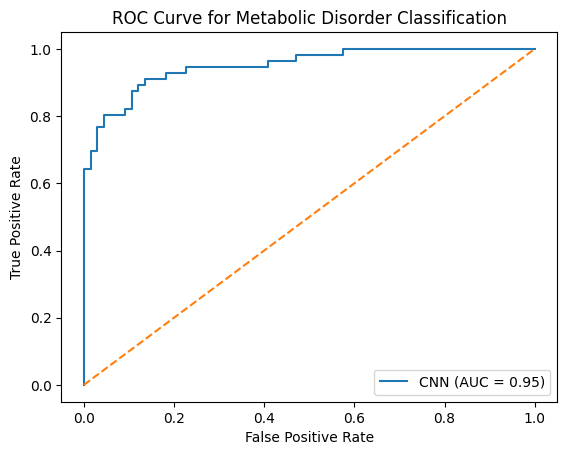

In [14]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='CNN (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Metabolic Disorder Classification')
plt.legend(loc='lower right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


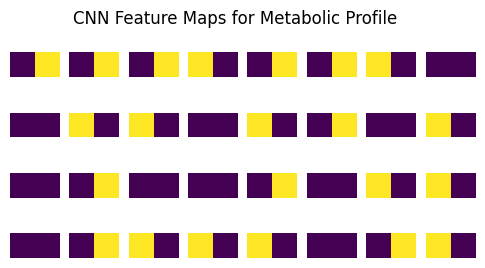

In [15]:
feature_extractor = tf.keras.Model(
    inputs=model.inputs,
    outputs=model.layers[0].output
)

feature_maps = feature_extractor.predict(X_test[:1])

plt.figure(figsize=(6,3))
for i in range(feature_maps.shape[-1]):
    plt.subplot(4,8,i+1)
    plt.imshow(feature_maps[0,:,:,i], cmap='viridis')
    plt.axis('off')

plt.suptitle("CNN Feature Maps for Metabolic Profile")
plt.show()
